In [10]:
import numpy as np
import pandas as pd
from sklearn import svm

import matplotlib.pyplot as plt
import seaborn as sns;sns.set(font_scale=1.2)

In [2]:
%matplotlib inline

In [55]:
recipes = pd.read_csv('c vs mf.csv')
print(recipes.head())

     Type  Flour  Milk  Sugar  Butter  Egg  Baking Powder  Vanilla  Salt
0  Muffin     55    28      3       7    5              2        0     0
1  Muffin     47    24     12       6    9              1        0     0
2  Muffin     47    23     18       6    4              1        0     0
3  Muffin     45    11     17      17    8              1        0     0
4  Muffin     50    25     12       6    5              2        1     0


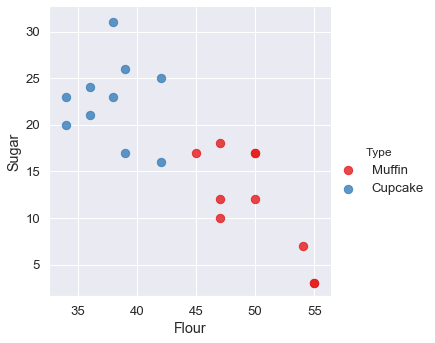

In [56]:
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})

In [57]:
type_label = np.where(recipes['Type'] == 'Muffin', 0, 1)
recipes_features = recipes.columns.values[1:].tolist()
recipes_features

['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']

In [58]:
ingredients = recipes[['Flour', 'Sugar']].values
print(ingredients)

[[55  3]
 [47 12]
 [47 18]
 [45 17]
 [50 12]
 [55  3]
 [54  7]
 [47 10]
 [50 17]
 [50 17]
 [39 26]
 [42 16]
 [34 20]
 [39 17]
 [38 23]
 [42 25]
 [36 21]
 [38 31]
 [36 24]
 [34 23]]


In [59]:
model = svm.SVC(kernel='linear')
model.fit(ingredients, type_label)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [60]:
w = model.coef_[0]
a = -w[0]/w[1]
xx = np.linspace(30,60)
yy = a*xx-(model.intercept_[0])/w[1]
print(yy)

[ 1.15779472e+16  1.10528750e+16  1.05278028e+16  1.00027306e+16
  9.47765844e+15  8.95258624e+15  8.42751405e+15  7.90244185e+15
  7.37736965e+15  6.85229746e+15  6.32722526e+15  5.80215306e+15
  5.27708087e+15  4.75200867e+15  4.22693647e+15  3.70186428e+15
  3.17679208e+15  2.65171988e+15  2.12664769e+15  1.60157549e+15
  1.07650329e+15  5.51431096e+14  2.63588995e+13 -4.98713297e+14
 -1.02378549e+15 -1.54885769e+15 -2.07392989e+15 -2.59900208e+15
 -3.12407428e+15 -3.64914648e+15 -4.17421867e+15 -4.69929087e+15
 -5.22436307e+15 -5.74943526e+15 -6.27450746e+15 -6.79957966e+15
 -7.32465185e+15 -7.84972405e+15 -8.37479625e+15 -8.89986844e+15
 -9.42494064e+15 -9.95001284e+15 -1.04750850e+16 -1.10001572e+16
 -1.15252294e+16 -1.20503016e+16 -1.25753738e+16 -1.31004460e+16
 -1.36255182e+16 -1.41505904e+16]


In [61]:
b = model.support_vectors_[0]
yy_down = a*xx + (b[1]-a*b[0])
b = model.support_vectors_[-1]
yy_up = a*xx + (b[1]-a*b[0])

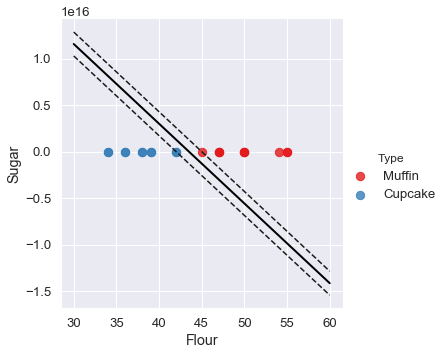

In [64]:
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70});
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx,yy_down,'k--')
plt.plot(xx,yy_up,'k--')


In [73]:
def muffin_or_cupcake(flour, sugar):
    if (model.predict([[flour, sugar]])) == 0:
        print("Muffin")
    else:
        print("Cupcake")

In [74]:
muffin_or_cupcake(60,55)

Muffin
